In [1]:
import pandas                             as    pd
import numpy                              as    np
import matplotlib.pyplot                  as    plt
import seaborn                            as    sns

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection              import train_test_split

import statsmodels
import statsmodels.api                    as      sm

from sklearn.preprocessing                import   StandardScaler,LabelEncoder

from sklearn                              import   metrics
from sklearn.metrics                      import   classification_report
from sklearn.metrics                      import   cohen_kappa_score
from sklearn.metrics                      import   confusion_matrix
from sklearn.metrics                      import   roc_curve, roc_auc_score
from sklearn.metrics                      import   accuracy_score
from sklearn.metrics                      import   ConfusionMatrixDisplay

from sklearn.linear_model                 import   LogisticRegression
from sklearn.tree                         import   DecisionTreeClassifier
from sklearn.ensemble                     import   RandomForestClassifier
from sklearn                              import   tree
from sklearn.model_selection              import   GridSearchCV

import pydotplus
from IPython.display import Image 

import time
from datetime import timedelta


In [2]:
"""
  Function Name: compare_models

  Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
  Input:  1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable

   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""

def compare_models(n_splits, random_state, X, Y):  

    ### To compare algorithms
    
    import  matplotlib.pyplot              as       plt
    from    sklearn.model_selection        import   KFold
    from    sklearn.model_selection        import   RepeatedStratifiedKFold
    from    sklearn.model_selection        import   cross_val_score
    
    from    sklearn.linear_model           import   LogisticRegression ### -------  Model 1 ----------------------
    from    sklearn.tree                   import   DecisionTreeClassifier ### -------  Model 2 ----------------------
    from    sklearn.neighbors              import   KNeighborsClassifier ### -------  Model 3 ----------------------
    from    sklearn.naive_bayes            import   GaussianNB ### -------  Model 4 ----------------------
    from    sklearn.ensemble               import   RandomForestClassifier ### -------  Model 5 ----------------------
    from    xgboost                        import   XGBClassifier ### -------  Model 6 ----------------------
    from    sklearn.ensemble               import   AdaBoostClassifier ### -------  Model 7 ----------------------
    from    sklearn.ensemble               import   GradientBoostingClassifier ### -------  Model 8 ----------------------
    from    sklearn.discriminant_analysis  import   LinearDiscriminantAnalysis as LDA ### -------  Model 9 ------------------
    from    sklearn.svm                    import   SVC ### -------  Model 10 ----------------------

    ### Prepare models
    
    models  = []

    models.append(('LR',   LogisticRegression())) # 1
    models.append(('CART', DecisionTreeClassifier())) # 2
    models.append(('KNN',  KNeighborsClassifier())) # 3 
    models.append(('NB',   GaussianNB())) # 4
    models.append(('RF',   RandomForestClassifier())) # 5
    models.append(('XGB',  XGBClassifier())) # 6 
    models.append(('ADA',  AdaBoostClassifier())) # 7 
    models.append(('GB',   GradientBoostingClassifier ())) # 8     
    models.append(('LDA',  LDA())) # 9 
    ## models.append(('SVC',  SVC(gamma = 'auto', kernel = 'rbf'))) # 10

   
    ### Evaluate model in turn
    
    scores_req             =     ['recall']
    
    for i in range(len(scores_req)):

        results                =     []
        names                  =     []
        
        scoring                =     scores_req[i]
        
        print(scoring)
        
        for name, model in models:
                print("\n n_splits %d random_state %d" % (n_splits, random_state))        	
                rskf            =   RepeatedStratifiedKFold(n_splits=2, n_repeats=2, random_state=36851234)
                cv_results      =   cross_val_score(model, X, Y, cv = rskf, scoring = scoring)
                results.append(cv_results)
                names.append(name)
                msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
                print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = plt.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(labels = names, rotation = 90)
        plt.show()

In [3]:
df = pd.read_csv('D:/DSE/Capstone Project/DataCo/DataCoSupplyChainDataset.csv', encoding='latin')

In [4]:
pd.options.display.max_columns = None

In [5]:
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Email,Customer Fname,Customer Id,Customer Lname,Customer Password,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Customer Id,order date (DateOrders),Order Id,Order Item Cardprod Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Product Price,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Order Region,Order State,Order Status,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Cally,20755,Holloway,XXXXXXXXX,Consumer,PR,5365 Noble Nectar Island,725.0,2,Fitness,18.251453,-66.037056,Pacific Asia,Bekasi,Indonesia,20755,1/31/2018 22:56,77202,1360,13.110000,0.04,180517,327.75,0.29,1,327.75,314.640015,91.250000,Southeast Asia,Java Occidental,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Irene,19492,Luna,XXXXXXXXX,Consumer,PR,2679 Rustic Loop,725.0,2,Fitness,18.279451,-66.037064,Pacific Asia,Bikaner,India,19492,1/13/2018 12:27,75939,1360,16.389999,0.05,179254,327.75,-0.80,1,327.75,311.359985,-249.089996,South Asia,Rajastán,PENDING,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,EE. UU.,XXXXXXXXX,Gillian,19491,Maldonado,XXXXXXXXX,Consumer,CA,8510 Round Bear Gate,95125.0,2,Fitness,37.292233,-121.881279,Pacific Asia,Bikaner,India,19491,1/13/2018 12:06,75938,1360,18.030001,0.06,179253,327.75,-0.80,1,327.75,309.720001,-247.779999,South Asia,Rajastán,CLOSED,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,EE. UU.,XXXXXXXXX,Tana,19490,Tate,XXXXXXXXX,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,19490,1/13/2018 11:45,75937,1360,22.940001,0.07,179252,327.75,0.08,1,327.75,304.809998,22.860001,Oceania,Queensland,COMPLETE,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,Puerto Rico,XXXXXXXXX,Orli,19489,Hendricks,XXXXXXXXX,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,19489,1/13/2018 11:24,75936,1360,29.500000,0.09,179251,327.75,0.45,1,327.75,298.250000,134.210007,Oceania,Queensland,PENDING_PAYMENT,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [6]:
# Converting Datetime Variables
df['order_date'] = pd.to_datetime(df['order date (DateOrders)'])

df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day

df.drop(['order date (DateOrders)','shipping date (DateOrders)'],axis=1,inplace=True)
df.drop(['order_date'],axis=1,inplace=True)

In [7]:
# Dropping irrelevant columns
not_needed=['Product Image','Product Status','Customer Email','Customer Password','Customer Fname','Customer Lname','Product Name','Delivery Status']
df.drop(not_needed,axis=1,inplace=True)

In [8]:
# Dropping Duplicate Columns
dup_col = ['Product Category Id','Order Item Product Price','Order Item Cardprod Id','Order Profit Per Order','Sales per customer','Order Customer Id']
df.drop(dup_col,axis=1,inplace=True)

In [9]:
# Dropping Columns with many Missing Values
miss_percent = (df.isnull().sum()*100/df.isnull().count())
k = miss_percent[miss_percent>80]
df.drop(k.index,axis=1,inplace=True)

In [10]:
category =  df.select_dtypes(include='object').columns
category

Index(['Type', 'Category Name', 'Customer City', 'Customer Country',
       'Customer Segment', 'Customer State', 'Customer Street',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Shipping Mode'],
      dtype='object')

In [11]:
numeric = df.select_dtypes(include='number').columns
numeric = numeric.drop('Late_delivery_risk')

In [12]:
numeric

Index(['Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Category Id', 'Customer Id', 'Customer Zipcode',
       'Department Id', 'Latitude', 'Longitude', 'Order Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Product Card Id', 'Product Price', 'order_year',
       'order_month', 'order_day'],
      dtype='object')

In [13]:
df.isnull().sum()>0

Type                             False
Days for shipping (real)         False
Days for shipment (scheduled)    False
Benefit per order                False
Late_delivery_risk               False
Category Id                      False
Category Name                    False
Customer City                    False
Customer Country                 False
Customer Id                      False
Customer Segment                 False
Customer State                   False
Customer Street                  False
Customer Zipcode                  True
Department Id                    False
Department Name                  False
Latitude                         False
Longitude                        False
Market                           False
Order City                       False
Order Country                    False
Order Id                         False
Order Item Discount              False
Order Item Discount Rate         False
Order Item Id                    False
Order Item Profit Ratio  

In [14]:
# For Customer Zipcode
cust_zip = df[df['Customer Zipcode'].isnull()]
cust_zip

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Price,Shipping Mode,order_year,order_month,order_day
35704,DEBIT,2,1,66.379997,1,65,Consumer Electronics,CA,EE. UU.,14577,Consumer,95758,Elk Grove,NaN,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,71024,63.220001,0.25,174339,0.35,1,252.880005,189.660004,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,252.880005,First Class,2017,11,2
46440,PAYMENT,4,4,10.910000,0,75,Video Games,CA,EE. UU.,17171,Corporate,95758,Elk Grove,NaN,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,73618,0.800000,0.02,176933,0.28,1,39.750000,38.959999,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,39.750000,Standard Class,2017,12,10
82511,DEBIT,4,4,59.990002,0,63,Children's Clothing,CA,EE. UU.,14046,Consumer,91732,El Monte,NaN,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,70493,57.139999,0.16,173808,0.20,1,357.100006,299.959992,Northern Europe,Inglaterra,COMPLETE,1350,357.100006,Standard Class,2017,10,26


In [15]:
for i in cust_zip.index:
    df.iloc[i,df.columns.get_loc('Customer Zipcode')] = df.iloc[i,df.columns.get_loc('Customer State')]
    df.iloc[i,df.columns.get_loc('Customer State')]   = df.iloc[i,df.columns.get_loc('Customer City')]
    df.iloc[i,df.columns.get_loc('Customer City')]    = df.iloc[i,df.columns.get_loc('Customer Street')]

In [16]:
df['Customer Zipcode'] = df['Customer Zipcode'].astype('float')

In [17]:
df.iloc[cust_zip.index]

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Price,Shipping Mode,order_year,order_month,order_day
35704,DEBIT,2,1,66.379997,1,65,Consumer Electronics,Elk Grove,EE. UU.,14577,Consumer,CA,Elk Grove,95758.0,10,Technology,39.134159,-123.718552,Europe,Valence,Francia,71024,63.220001,0.25,174339,0.35,1,252.880005,189.660004,Western Europe,Auvernia-Ródano-Alpes,COMPLETE,1352,252.880005,First Class,2017,11,2
46440,PAYMENT,4,4,10.910000,0,75,Video Games,Elk Grove,EE. UU.,17171,Corporate,CA,Elk Grove,95758.0,9,Discs Shop,38.408573,-121.449112,Pacific Asia,Manila,Filipinas,73618,0.800000,0.02,176933,0.28,1,39.750000,38.959999,Southeast Asia,Capital Nacional,PENDING_PAYMENT,1362,39.750000,Standard Class,2017,12,10
82511,DEBIT,4,4,59.990002,0,63,Children's Clothing,El Monte,EE. UU.,14046,Consumer,CA,El Monte,91732.0,4,Apparel,34.071892,-118.013886,Europe,Sheffield,Reino Unido,70493,57.139999,0.16,173808,0.20,1,357.100006,299.959992,Northern Europe,Inglaterra,COMPLETE,1350,357.100006,Standard Class,2017,10,26


In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

IQR = Q3 - Q1

df_iqr = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

df_iqr.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Late_delivery_risk,Category Id,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,Customer State,Customer Street,Customer Zipcode,Department Id,Department Name,Latitude,Longitude,Market,Order City,Order Country,Order Id,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Region,Order State,Order Status,Product Card Id,Product Price,Shipping Mode,order_year,order_month,order_day
3,DEBIT,3,4,22.860001,0,73,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,CA,3200 Amber Bend,90027.0,2,Fitness,34.125946,-118.291016,Pacific Asia,Townsville,Australia,75937,22.940001,0.07,179252,0.08,1,327.75,304.809998,Oceania,Queensland,COMPLETE,1360,327.75,Standard Class,2018,1,13
4,PAYMENT,2,4,134.210007,0,73,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,PR,8671 Iron Anchor Corners,725.0,2,Fitness,18.253769,-66.037048,Pacific Asia,Townsville,Australia,75936,29.500000,0.09,179251,0.45,1,327.75,298.250000,Oceania,Queensland,PENDING_PAYMENT,1360,327.75,Standard Class,2018,1,13
5,TRANSFER,6,4,18.580000,0,73,Sporting Goods,Tonawanda,EE. UU.,19488,Consumer,NY,2122 Hazy Corner,14150.0,2,Fitness,43.013969,-78.879066,Pacific Asia,Toowoomba,Australia,75935,32.779999,0.10,179250,0.06,1,327.75,294.980011,Oceania,Queensland,CANCELED,1360,327.75,Standard Class,2018,1,13
6,DEBIT,2,1,95.180000,1,73,Sporting Goods,Caguas,Puerto Rico,19487,Home Office,PR,1879 Green Pine Bank,725.0,2,Fitness,18.242538,-66.037056,Pacific Asia,Guangzhou,China,75934,39.330002,0.12,179249,0.33,1,327.75,288.420013,Eastern Asia,Guangdong,COMPLETE,1360,327.75,First Class,2018,1,13
7,TRANSFER,2,1,68.430000,1,73,Sporting Goods,Miami,EE. UU.,19486,Corporate,FL,7595 Cotton Log Row,33162.0,2,Fitness,25.928869,-80.162872,Pacific Asia,Guangzhou,China,75933,42.610001,0.13,179248,0.24,1,327.75,285.140015,Eastern Asia,Guangdong,PROCESSING,1360,327.75,First Class,2018,1,13


In [19]:
df_iqr.shape

(147928, 38)

In [20]:
lbl=LabelEncoder()

for i in category:
    df_iqr[i] = lbl.fit_transform(df_iqr[i])

In [21]:
ss=StandardScaler()

for i in numeric:
    df_iqr[i] = ss.fit_transform(df_iqr[[i]])

In [22]:
unwanted_cols =   ['Customer Id','Order Item Id','Product Card Id', 'Days for shipment (scheduled)','Days for shipping (real)', 
                   'Customer Street','Order Id','Longitude','Latitude']
df_iqr.drop(unwanted_cols,axis=1,inplace=True)

In [23]:
df_iqr.shape

(147928, 29)

In [24]:
feature_names  =  df_iqr.columns.drop('Late_delivery_risk')
print(feature_names)

Index(['Type', 'Benefit per order', 'Category Id', 'Category Name',
       'Customer City', 'Customer Country', 'Customer Segment',
       'Customer State', 'Customer Zipcode', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Profit Ratio', 'Order Item Quantity', 'Sales',
       'Order Item Total', 'Order Region', 'Order State', 'Order Status',
       'Product Price', 'Shipping Mode', 'order_year', 'order_month',
       'order_day'],
      dtype='object')


In [25]:
X = df_iqr.drop('Late_delivery_risk',axis=1)
y = df_iqr['Late_delivery_risk']

In [26]:
print('X dimension {}'. format(X.shape))
print('y dimension {}'. format(y.shape))

X dimension (147928, 28)
y dimension (147928,)


In [27]:
start_time = time.time()

recall

 n_splits 5 random_state 12345
LR: 0.613183 (0.003180)

 n_splits 5 random_state 12345
CART: 0.760586 (0.010410)

 n_splits 5 random_state 12345
KNN: 0.672092 (0.002403)

 n_splits 5 random_state 12345
NB: 0.544867 (0.000898)

 n_splits 5 random_state 12345
RF: 0.670679 (0.002187)

 n_splits 5 random_state 12345
XGB: 0.640138 (0.004176)

 n_splits 5 random_state 12345
ADA: 0.548101 (0.003396)

 n_splits 5 random_state 12345
GB: 0.565421 (0.003845)

 n_splits 5 random_state 12345
LDA: 0.583765 (0.000282)


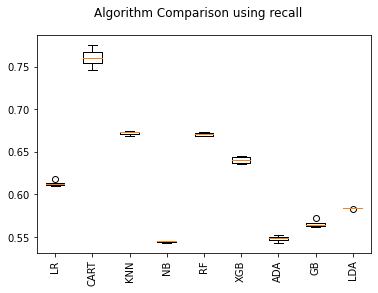

In [28]:
n_splits     =    5
random_state =    12345

compare_models(n_splits, random_state, X, y)